#Applying Machine Learning to Financial Aid Policy#

## 1 - Packages ##

First, let's run the cell below to import all the packages that you will need during this assignment. 
- [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
- [pandas](https://pandas.pydata.org/) is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool.
- [matplotlib](http://matplotlib.org) is a famous library to plot graphs in Python.
- [sklearn](https://scikit-learn.org/) is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms. 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
%matplotlib inline


## 2 - Overview of the Problem set ##

**Problem Statement**: You are given a dataset containing details of Financial aid applicants such as their Electricity bill, School_fees, Income class they belong to etc. We can automate the Financial Aid approval process which will save both time and effort. 

We will build a simple logistic regression algorithm that can correctly classify two things.

1.   Is the applicant eligible for Financial aid.
2.   If yes, then how much should be the waiver.

Let's get more familiar with the dataset. Load the data by running the following code.

Note: Upload the dataset file to the runtime first.

## 3 - Logistic Regression ##
Logistic regression is a supervised learning classification algorithm used to predict the probability of a target variable. The nature of target or dependent variable is dichotomous, which means there would be only two possible classes.

In simple words, the dependent variable is binary in nature having data coded as either 1 (stands for success/yes) or 0 (stands for failure/no).

Mathematically, a logistic regression model predicts P(Y=1) as a function of X. It is one of the simplest ML algorithms that can be used for various classification problems such as spam detection, Diabetes prediction, cancer detection etc.
<img
src="https://ibm.box.com/shared/static/kgv9alcghmjcv97op4d6onkyxevk23b1.png" width="400" align="center">)<img
src="https://miro.medium.com/max/1280/1*OUOB_YF41M-O4GgZH_F2rw.png" width="400" align="center">

##4 - About the datasest##
We will use a demo Finanical aid dataset for predicting eligibilty of the candidate and the discount that shall be given. Each row represents one Candidate. The data is relatively easy to understand, and you may uncover insights you can use immediately.
We analyze the relations that lie in the dataset and use it to automate the approval process which will save time and effort.

Note: For more information about the dataset, please refer the report.

Now, read data using pandas dataframe:

In [ ]:
data = pd.read_csv("/content/ShuffledDS.csv")
data.head()

,Name,Electricity_bill,Income_class,School_fees,Exception,Aid_eligibility,Aid_percent
0,PRATEEK,4235,6,83097,0,0,0
1,GIRISH,4100,2,87792,0,1,50
2,shrinidhi,4036,6,90266,0,0,0
3,arti,1668,3,18965,0,1,25
4,Rajeev,2910,1,40356,0,1,75


## 5 - Data visualisation ##
By using visual elements like charts, graphs, and maps, data visualization tools provide an accessible way to see and understand trends, outliers, and patterns in data.

####Electricity Bill -  Most recent electricity bill amount (0-5000 INR)


Text(0, 0.5, 'Electricity bill (in rupees)')

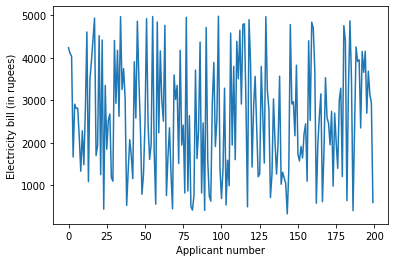

In [ ]:
plt.plot(data['Electricity_bill'])
plt.xlabel("Applicant number")
plt.ylabel("Electricity bill (in rupees)")

####School fees -  School fees of the institution they attend(in INR).

Text(0, 0.5, 'School fees (in rupees)')

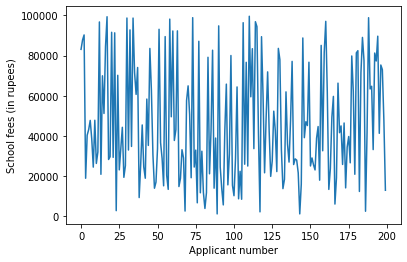

In [ ]:
plt.plot(data['School_fees'])
plt.xlabel("Applicant number")
plt.ylabel("School fees (in rupees)")

####Exception - Special cases (When the income of the candidate is relatively high but they show genuine need for financial aid. Example: All the money is being spent on an ailing family member.)


Text(0, 0.5, 'Number of applicants')

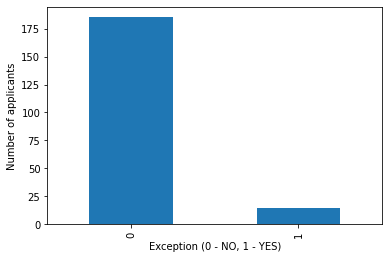

In [ ]:
data['Exception'].value_counts().plot.bar()
data['Exception'].value_counts()
plt.xlabel("Exception (0 - NO, 1 - YES)")
plt.ylabel("Number of applicants")

#### Aid_percent - The percentage of fees that has been discounted. ( 0 | 25 | 50 | 75 )####

Text(0, 0.5, 'Number of applicants')

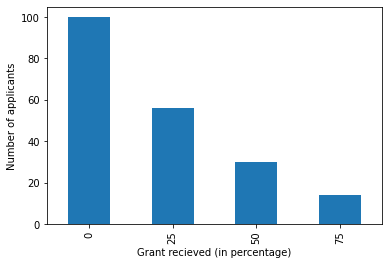

In [ ]:
data['Aid_percent'].value_counts().plot.bar()
data['Aid_percent'].value_counts()
plt.xlabel("Grant recieved (in percentage)")
plt.ylabel("Number of applicants")


#### Aid_eligibility - Is the candidate eligible for aid or not?####



Text(0, 0.5, 'Number of applicants')

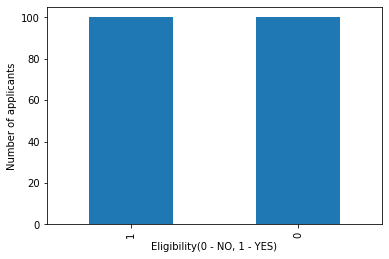

In [ ]:
data['Aid_eligibility'].value_counts().plot.bar()
data['Aid_eligibility'].value_counts()
plt.xlabel("Eligibility(0 - NO, 1 - YES)")
plt.ylabel("Number of applicants")

####Income classes - Class they belong to based on Annual family income. 

*   Poor (**1**)- Annual income less than 80000 pa
*   Lower Class (**2**) - Annual income between 1 lac pa - 3.5 lac.
*   Lower middle class (**3**) - 3.75 lacs to 9 lacs.
*   Upper middle class(**4**)  - 10 lacs to 25 lacs
*   Rich lower bracket (**5**) - 27 lacs to 50 lacs.
*   Rich upper bracket (**6**) - 55 lacs to 1.5 crore

Text(0, 0.5, 'Number of people belonging to the class')

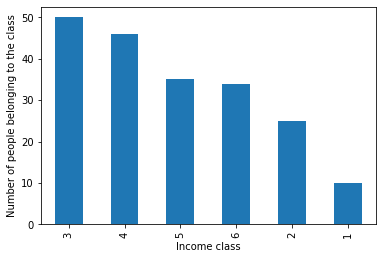

In [ ]:
data['Income_class'].value_counts().plot.bar()
data['Income_class'].value_counts()
plt.xlabel("Income class")
plt.ylabel("Number of people belonging to the class")

#### Plotting graphs to depict the relation between the variables   ####


* **Electricity bill vs Income class**

Text(0.5, 1.0, 'Relation between Electricity bill and Income classes')

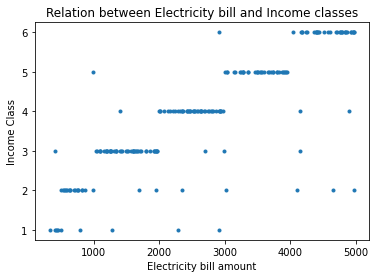

In [ ]:
plt.scatter(data.Electricity_bill , data.Income_class ,marker= "." )
plt.xlabel("Electricity bill amount")
plt.ylabel("Income Class")
plt.title("Relation between Electricity bill and Income classes")

* **Electricity bill vs Discount percentage**

Text(0.5, 1.0, 'Relation between electricity bill and Fees waiver')

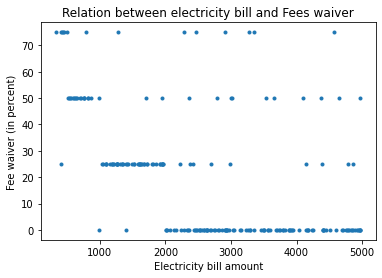

In [ ]:
plt.scatter(data.Electricity_bill , data.Aid_percent,marker= ".")
plt.xlabel("Electricity bill amount")
plt.ylabel("Fee waiver (in percent)")
plt.title("Relation between electricity bill and Fees waiver")

* **Electricity bill vs School fees**

Text(0.5, 1.0, 'Relation between Electricity bill and School fees')

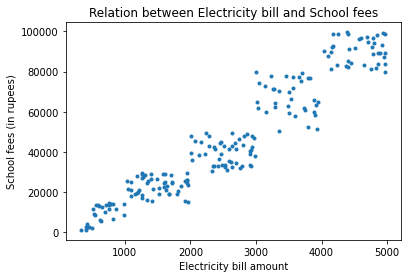

In [ ]:
plt.scatter(data.Electricity_bill , data.School_fees, marker= ".")
plt.xlabel("Electricity bill amount")
plt.ylabel("School fees (in rupees)")
plt.title("Relation between Electricity bill and School fees")

##6 -  Pre-processing##

Using the dataframae, declare the following variables:

* X as the Feature Matrix (data of input variables)

* y1 as the response vector for Aid eligibilty (target or output)

* y2 as the respnse vector for Aid discount (target or output)

Remove the column containing names since it doesn't contain any useful information for training.

In [ ]:
X = data[['Electricity_bill', 'Income_class', 'School_fees', 'Exception']] .values  #.astype(float)
X[0:15]

array([[ 4235,     6, 83097,     0],
       [ 4100,     2, 87792,     0],
       [ 4036,     6, 90266,     0],
       [ 1668,     3, 18965,     0],
       [ 2910,     1, 40356,     0],
       [ 2809,     4, 43226,     0],
       [ 2815,     4, 47751,     0],
       [ 2137,     4, 38549,     0],
       [ 1335,     3, 24512,     0],
       [ 2285,     4, 47825,     0],
       [ 1487,     3, 26335,     0],
       [ 2757,     4, 32023,     0],
       [ 4605,     6, 96726,     0],
       [ 1090,     3, 20932,     0],
       [ 3497,     5, 69940,     0]])

In [ ]:
y1 = data['Aid_eligibility'].values
y1[0:5]

array([0, 1, 0, 1, 1])

In [ ]:
y2 = data['Aid_percent'].values
y2[0:5]

array([ 0, 50,  0, 25, 75])

###Standardization###

Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data.Standardize features by removing the mean and scaling to unit variance

The standard score of a sample x is calculated as:

z = (x - u) / s

where u is the mean of the training samples or zero if with_mean=False, and s is the standard deviation of the training samples or one if with_std=False.

Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. Mean and standard deviation are then stored to be used on later data using transform.

In [ ]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 1.216747  ,  1.49598194,  1.28967227, -0.2847474 ],
       [ 1.11654946, -1.30679453,  1.45367765, -0.2847474 ],
       [ 1.0690484 ,  1.49598194,  1.54009923, -0.2847474 ],
       [-0.68849071, -0.60610041, -0.95058181, -0.2847474 ],
       [ 0.23332668, -2.00748865, -0.20335305, -0.2847474 ]])

###Test Train Split###
Out of Sample Accuracy is the percentage of correct predictions that the model makes on data that that the model has NOT been trained on. Doing a train and test on the same dataset will most likely have low out-of-sample accuracy, due to the likelihood of being over-fit.

It is important that our models have a high, out-of-sample accuracy, because the purpose of any model, of course, is to make correct predictions on unknown data. So how can we improve out-of-sample accuracy? One way is to use an evaluation approach called Train/Test Split. Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set.

This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X,y1,test_size=0.3, shuffle=True ,random_state = 52)

##7 - Modelling and Prediction##

Aid Eligibility of the applicant: 

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
model = LogisticRegressionCV(solver="newton-cg") 
model.fit(X1_train, y1_train)
model.score(X1_test,y1_test)

1.0

In [ ]:
pred1 = model.predict(X1_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y1_test,pred1)
print(cm)

[[31  0]
 [ 0 29]]


In [ ]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y1_train, model.predict(X1_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y1_test, pred1))

Train set Accuracy:  1.0
Test set Accuracy:  1.0


**Comment**: Both Training and Testing accuracies are equal to 1.0 (100%). Our model is able to predict the eligibilities with 100% accuracy. It has decoded the underlying relations in the data and using it to correctly classify unseen data.

Discount granted:

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.3, shuffle=True ,random_state = 82)
from sklearn.linear_model import LogisticRegressionCV
model = LogisticRegressionCV(solver="newton-cg") 
model.fit(X2_train, y2_train)
model.score(X2_test,y2_test)

0.95

In [ ]:
pred2 = model.predict(X2_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y2_test,pred2)
print(cm)

[[32  0  0  0]
 [ 0 13  0  0]
 [ 0  1  9  0]
 [ 0  2  0  3]]


In [ ]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y2_train, model.predict(X2_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y2_test, pred2))

Train set Accuracy:  0.9428571428571428
Test set Accuracy:  0.95


**Comment**: Both Training and Testing accuracies are close to 1.0 (100%). Our model is able to predict the discount to be given based on the input features with almost 100% accuracy. It has decoded the underlying relations in the data and using it to correctly classify unseen data.

<h1><center>Thank you for following along. </center></h1>